## SIR model with seasonality

### Nazmi Burak Budanur

In [1]:
import numpy as np
from importlib import reload
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
import compartmental
from scipy.integrate import odeint
from IPython.display import display, Math, HTML
import matplotlib.image as mpimg
matplotlib.rcParams['text.usetex'] = True
%config InlineBackend.figure_format = 'retina'

In [2]:
# Generate a model

compartments = [
    ('S'    , {"layer" : 1}),    # Susceptible
    ('I'    , {"layer" : 2}),    # Infectious
    ('R'    , {"layer" : 3}),    # Removed (recovered/dead)
]

parameters = [
    'beta',     # avg cont. / pers. / day * prob(asymp. trans.)
    'gamma',    # (days)^-1 Inverse mean exposed period  
    'N',
]

inputs = [
    'f',     # time-dependent seasonality factor
]

rates = [
    ('S', 'I', {"label" : "f(t) * beta * S * I / N"}), 
    ('I', 'R', {"label" : "gamma * I"})
]

model = compartmental.Model()
model.set_compartments(compartments)
model.set_rates(rates)
model.set_parameters(parameters)
model.set_inputs(inputs)

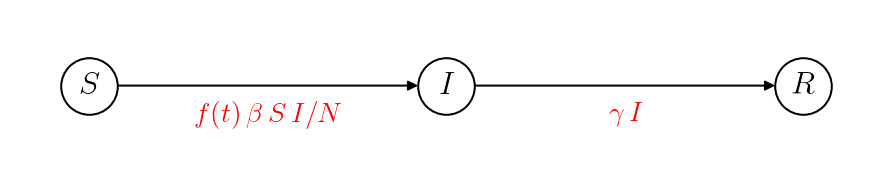

In [3]:
fig_model = model.visualize(figsize=(6,1))
fig_model.savefig("SIR_seasonality_model.png")
#ax_model = fig_model.gca()
#ax_model.remove()

In [4]:
ode_latex, ode_symbolic, ode = model.generate_ode()
disp = display(Math(ode_latex))

<IPython.core.display.Math object>

In [5]:
# Run an epidemic simulation with 
# N = 1000, gamma = 1/3 (days^-1), beta = 1.0 
# i.e. R_0 = beta / gamma = 3 ~ covid-19

# Generate model ODEs

def season(t):
    return 1 + 0.5 * np.sin((t / 365) * 2 * np.pi)


parameter_values = [1, 2.0 ** -1, 1000]
initial_population = np.array([999, 1, 0]) # 1 initial infection
simulation_time = np.arange(0, 365)

population = odeint(ode, 
                    initial_population, 
                    simulation_time, 
                    args = (parameter_values, 
                            [season],))

In [6]:
def plot_results(ax = None, scale = 1):

    dim = len(model.compartments)

    if ax == None:
        fig = plt.figure(figsize=(6,6))
        ax  = fig.gca()

    for k in range(dim):
        ax.plot(simulation_time, 
                population[:, k], 
                label='$'+model.compartments[k]+'$')
    
    ax.tick_params(labelsize=12 * scale)
    ax.legend(fontsize=12 * scale, framealpha=1)
    ax.set_xlim(0, 50)
    ax.grid(True)
    ax.set_xlabel('Days', fontsize=12 * scale)
    ax.set_ylabel('Population', fontsize=12 * scale)

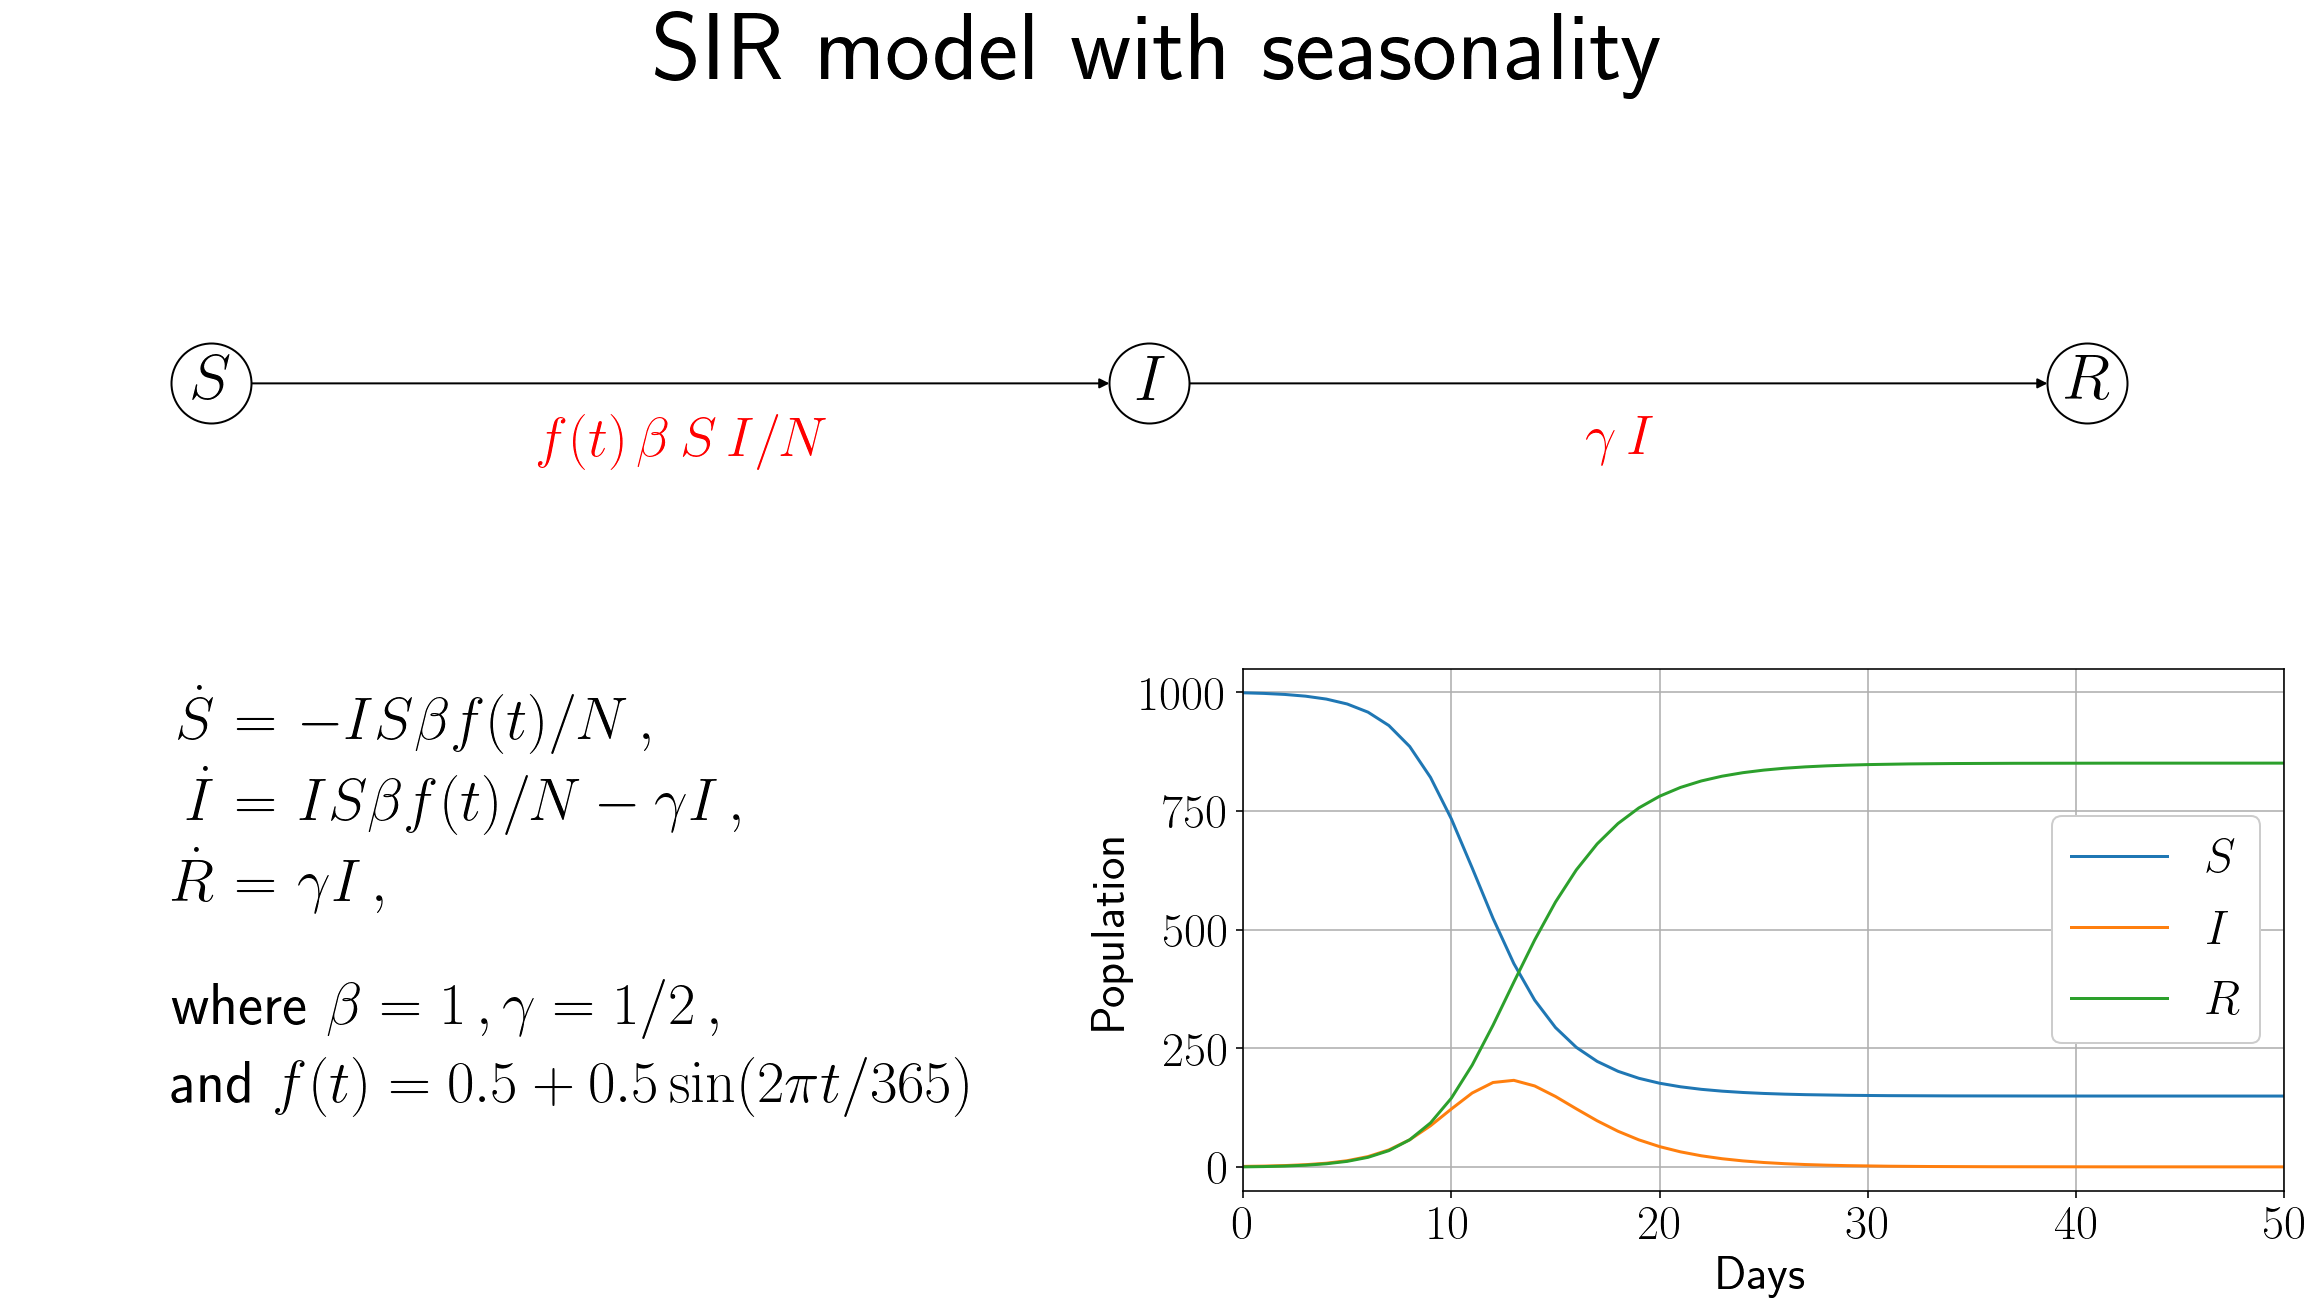

In [7]:
### Single-slide summary of the notebook
### Intended use: 
### > jupyter nbconvert Example_SIR_seasonality.ipynb --to slides --no-input

slide = plt.figure(figsize=(16,9), constrained_layout=True).subplot_mosaic(
    """
    TT
    LR
    """)

slide_fig = plt.gcf()
Title = slide_fig.suptitle("SIR model with seasonality", fontsize=48)

Top = slide['T']
Top.axis("off")
slide_fig = model.visualize(ax=Top, scale=2)

Left  = slide['L']
Left.axis("off")


eq1 = (r"\begin{eqnarray*}"
       r"\dot{S} &=& - I S \beta f(t) / N \,, \\"
       r"\dot{I} &=& I S \beta f(t) / N - \gamma I \,, \\"
       r"\dot{R} &=& \gamma I \,,"
       r"\end{eqnarray*}")


eq2 = (r"where $\beta = 1\,, \gamma = 1/2\,,$")
eq3 = (r"and $f(t) = 0.5 + 0.5 \sin(2 \pi t / 365)$")


Left.text(0.15, 0.75, eq1, fontsize=30,
        horizontalalignment="left", verticalalignment="center")

Left.text(0.15, 0.35, eq2, fontsize=30,
        horizontalalignment="left", verticalalignment="center")

Left.text(0.15, 0.2, eq3, fontsize=30,
        horizontalalignment="left", verticalalignment="center")


Right = slide['R']
plot_results(ax=Right, scale=2)

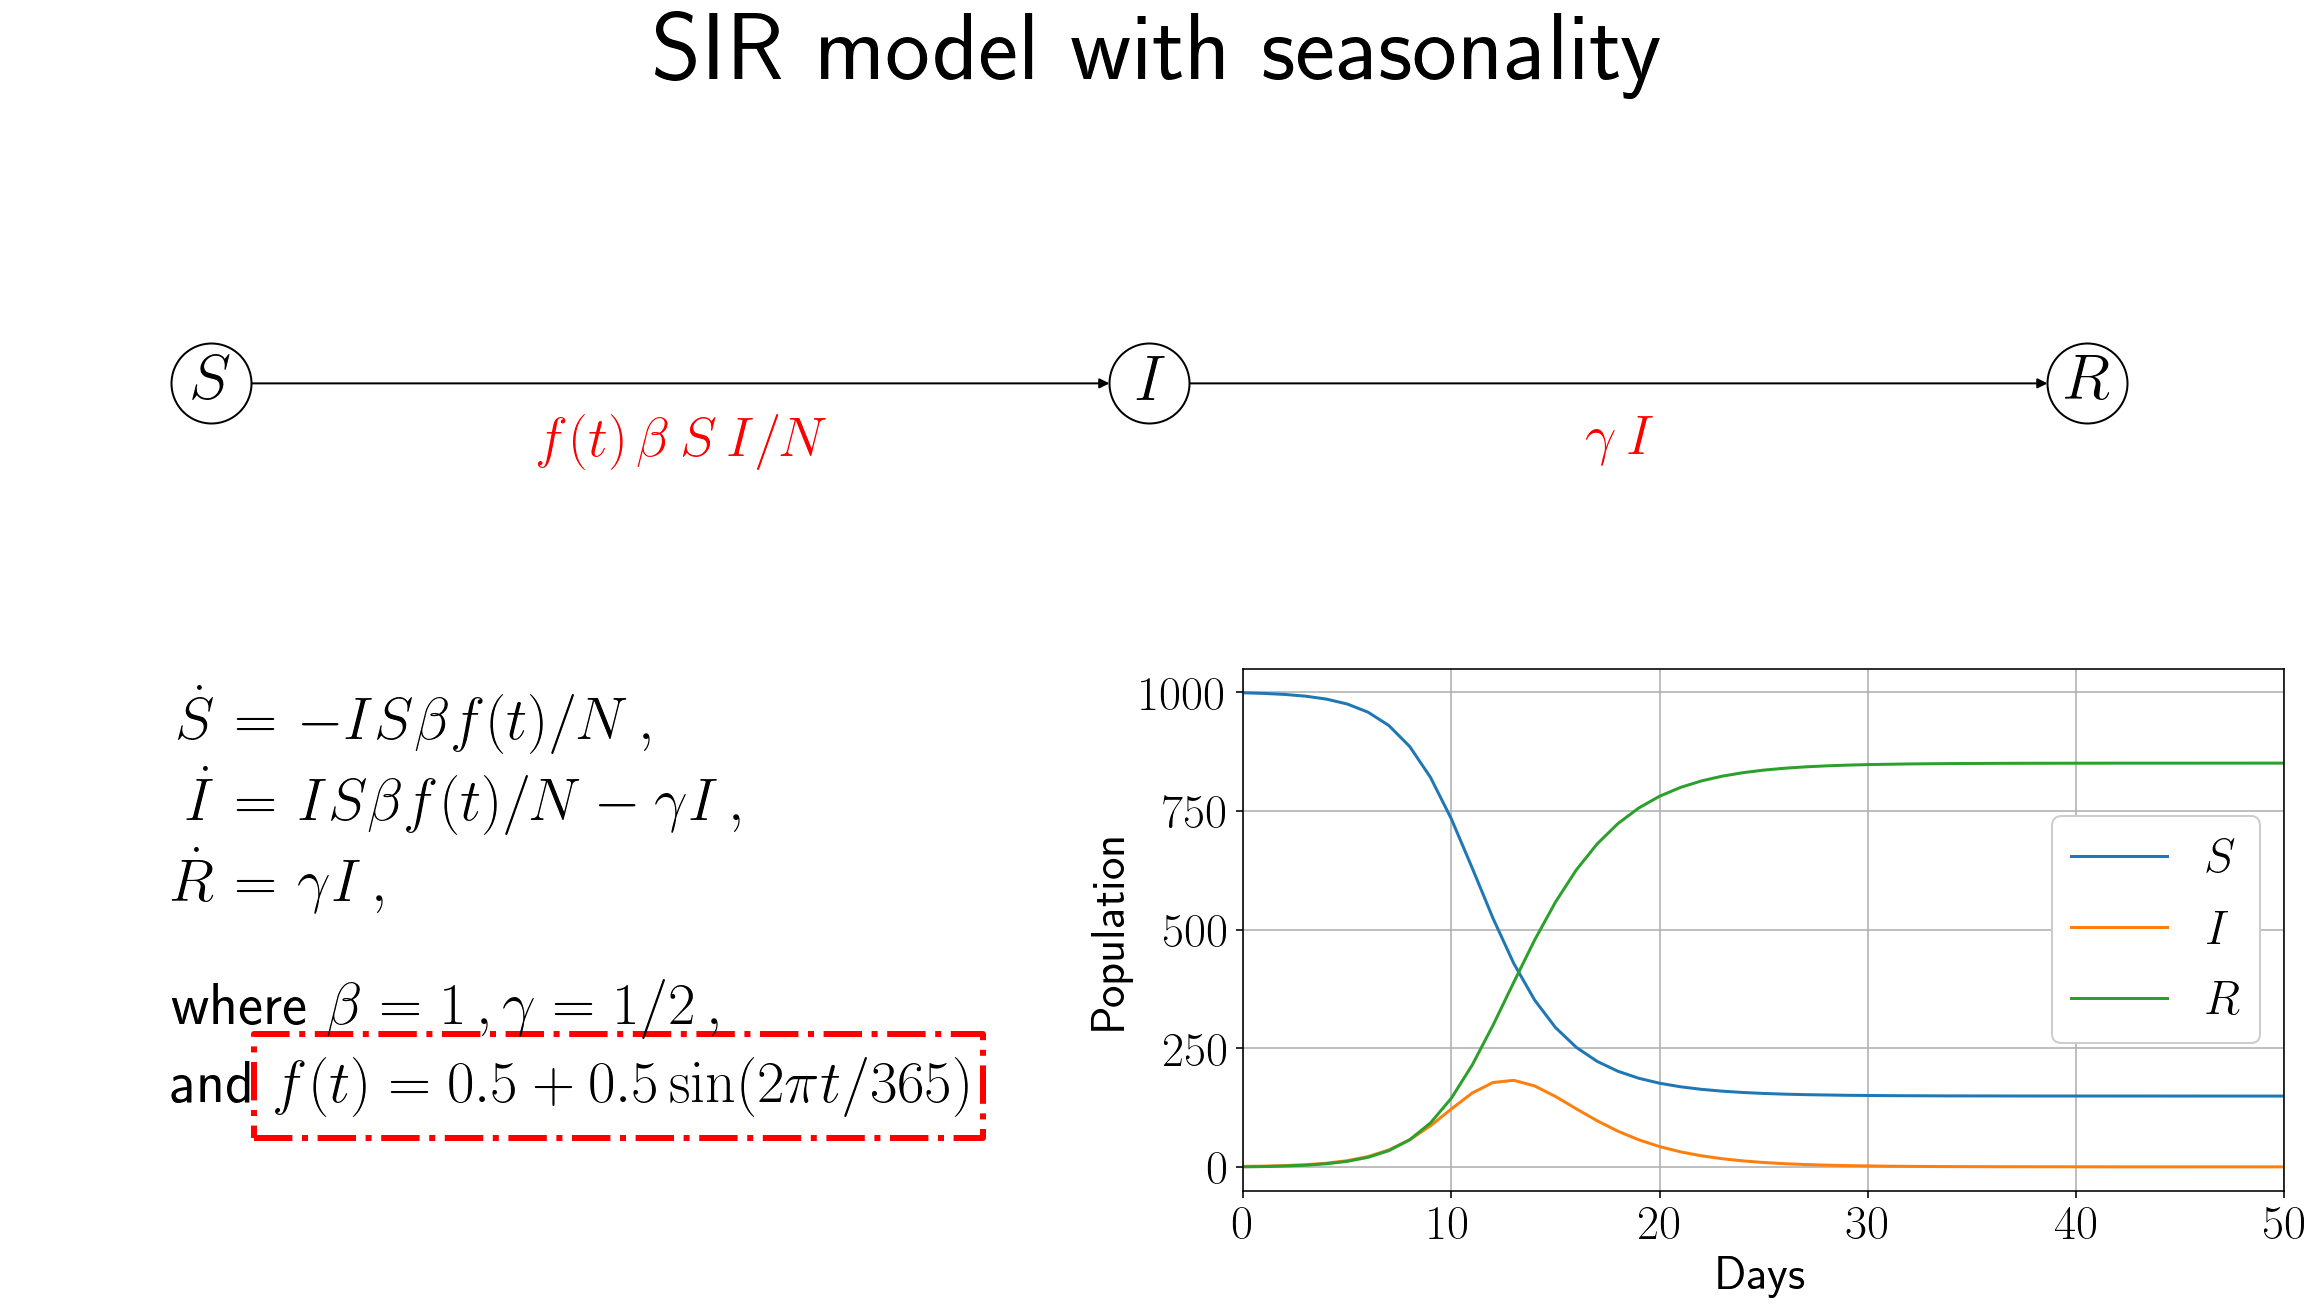

In [8]:
slide_fig_highlight = slide_fig

for ax in slide_fig_highlight.axes:
    if ax.get_label() == 'L':
        ax_L = ax

highlight = Rectangle((0.23, 0.1), 0.7, 0.2, 
                      edgecolor='red', 
                      fill=False, 
                      lw=3, 
                      joinstyle='round',
                     ls='-.')
ax_L.add_patch(highlight)

slide_fig_highlight

# Conclusions

- We illustrated the SIR Model with seasonality effects that modify the transmission rate.